<a href="https://colab.research.google.com/github/bofflli/cuanti2022/blob/main/tp_final_cuantitativa_boffelli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#se importan las librerìas necesarias 
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [38]:
#carga los datos de incendios por provincia
urli = 'https://raw.githubusercontent.com/bofflli/cuanti2022/d2b72bb313c3e3801392f05c273595f16b492fd7/cant-inc-prov.csv'

dbincendios = pd.read_csv(urli, sep = ';', encoding = 'latin-1')

In [39]:
#carga los datos de los proyectos y las provincias con firmantes
urlp = 'https://raw.githubusercontent.com/bofflli/cuanti2022/d2b72bb313c3e3801392f05c273595f16b492fd7/DBproyectos.csv'

dbproyectos = pd.read_csv(urlp, sep = ';', encoding = 'latin-1')

In [40]:
#elimina Parques Nacionales
dbincendios.drop(dbincendios[dbincendios['incendio_provincia'] == 'Parques Nacionales'].index, inplace = True)

#elimina columnas no relevantes para el trabajo
dbincendios.drop(columns = ['incendio_negligencia_numero', 'incendio_intencional_numero', 'incendio_natural_numero', 'incendio_desconocida_numero'], inplace = True)

#modifica filas por problemas de tildes
dbincendios = dbincendios.replace(to_replace = 'Santa Fé', value = 'Santa Fe', regex = True)

dbincendios.head()

,incendio_anio,incendio_provincia,incendio_total_numero
0,2013,Buenos Aires,458
1,2013,Catamarca,90
2,2013,Chaco,480
3,2013,Chubut,106
4,2013,Ciudad Autónoma de Buenos Aires,6


In [41]:
#se modifica la columna de año para que sea de tipo datetime y se toman en cuenta los casos a partir del año a trabajar
dbincendios['incendio_anio'] = pd.to_datetime(dbincendios['incendio_anio'], format = '%Y')
dbincendios = dbincendios[dbincendios['incendio_anio'] >= '2013']

#se cambia el nombre de la columna 
dbincendios.rename(columns = {'incendio_provincia':'Provincia', 'incendio_anio':'Año'}, inplace = True)

dbincendios.head()

,Año,Provincia,incendio_total_numero
0,2013-01-01,Buenos Aires,458
1,2013-01-01,Catamarca,90
2,2013-01-01,Chaco,480
3,2013-01-01,Chubut,106
4,2013-01-01,Ciudad Autónoma de Buenos Aires,6


In [42]:
#se borra columna vacia
dbproyectos = dbproyectos.drop(columns = 'Unnamed: 6')

#se eliminan columnas que no son utiles para este trabajo
dbproyectos.drop(columns = ['Mes', 'Firmante', 'Interbloque', 'Idproyecto'], inplace = True)

#se cambia la columna de año para que esté en el mismo formato que la del dataframe de incendios
dbproyectos['Año'] = pd.to_datetime(dbproyectos['Año'], format = "%Y")

dbproyectos.head()

,Año,Provincia
0,2013-01-01,Entre Ríos
1,2013-01-01,Santa Fe
2,2016-01-01,La Rioja
3,2016-01-01,Río Negro
4,2017-01-01,Santa Fe


In [43]:
#estadística descriptiva básica para indicador de grado de representación
dbproyectos.describe(datetime_is_numeric=True)

,Año
count,194
mean,2020-06-20 13:14:13.608247296
min,2013-01-01 00:00:00
25%,2020-01-01 00:00:00
50%,2020-01-01 00:00:00
75%,2022-01-01 00:00:00
max,2022-01-01 00:00:00


In [44]:
#se agrega columna que cuenta según las columnas que interesan
pr_agrupados = dbproyectos[['Año', 'Provincia']].value_counts().reset_index().rename(columns = {0 : 'Contador'})

pr_agrupados.head()

,Año,Provincia,Contador
0,2020-01-01,Buenos Aires,25
1,2022-01-01,Buenos Aires,25
2,2020-01-01,Santa Fe,11
3,2022-01-01,Santa Fe,10
4,2020-01-01,Mendoza,9


In [45]:
#estadistica descriptiva para indicador de grado de representacion (ver solamente "contador")
pr_agrupados.groupby(['Provincia']).describe(datetime_is_numeric=True)

Año                                            \
                    count                 mean                  min   
Provincia                                                             
Buenos Aires            3  2019-09-01 16:00:00  2017-01-01 00:00:00   
CABA                    3  2020-01-01 08:00:00  2018-01-01 00:00:00   
Catamarca               1  2022-01-01 00:00:00  2022-01-01 00:00:00   
Chaco                   2  2020-12-31 12:00:00  2020-01-01 00:00:00   
Chubut                  2  2020-12-31 12:00:00  2020-01-01 00:00:00   
Corrientes              2  2020-12-31 12:00:00  2020-01-01 00:00:00   
Córdoba                 2  2020-12-31 12:00:00  2020-01-01 00:00:00   
Entre Ríos              4  2018-04-02 06:00:00  2013-01-01 00:00:00   
Formosa                 2  2020-12-31 12:00:00  2020-01-01 00:00:00   
Jujuy                   2  2020-12-31 12:00:00  2020-01-01 00:00:00   
La Pampa                2  2020-12-31 12:00:00  2020-01-01 00:00:00   
La Rioja                3  2019-05-02 16:00:00  2016-01-01 00:00:00   
Mendoza                 3  2019-09-01 16:00:00  2017-01-01 00:00:00   
Misiones                2  2020-12-31 12:00:00  2020-01-01 00:00:00   
Neuquén                 1  2020-01-01 00:00:00  2020-01-01 00:00:00   
Río Negro               3  2017-12-31 16:00:00  2016-01-01 00:00:00   
Salta                   2  2020-12-31 12:00:00  2020-01-01 00:00:00   
San Luis                2  2018-07-02 12:00:00  2017-01-01 00:00:00   
Santa Cruz              2  2020-12-31 12:00:00  2020-01-01 00:00:00   
Santa Fe                4  2018-01-01 00:00:00  2013-01-01 00:00:00   
Santiago del Estero     1  2020-01-01 00:00:00  2020-01-01 00:00:00   
Tierra del Fuego        2  2020-12-31 12:00:00  2020-01-01 00:00:00   
Tucumán                 2  2018-07-02 12:00:00  2017-01-01 00:00:00   

                                                               \
                                     25%                  50%   
Provincia                                                       
Buenos Aires         2018-07-02 12:00:00  2020-01-01 00:00:00   
CABA                 2019-01-01 00:00:00  2020-01-01 00:00:00   
Catamarca            2022-01-01 00:00:00  2022-01-01 00:00:00   
Chaco                2020-07-01 18:00:00  2020-12-31 12:00:00   
Chubut               2020-07-01 18:00:00  2020-12-31 12:00:00   
Corrientes           2020-07-01 18:00:00  2020-12-31 12:00:00   
Córdoba              2020-07-01 18:00:00  2020-12-31 12:00:00   
Entre Ríos           2016-10-01 12:00:00  2019-01-01 00:00:00   
Formosa              2020-07-01 18:00:00  2020-12-31 12:00:00   
Jujuy                2020-07-01 18:00:00  2020-12-31 12:00:00   
La Pampa             2020-07-01 18:00:00  2020-12-31 12:00:00   
La Rioja             2017-12-31 12:00:00  2020-01-01 00:00:00   
Mendoza              2018-07-02 12:00:00  2020-01-01 00:00:00   
Misiones             2020-07-01 18:00:00  2020-12-31 12:00:00   
Neuquén              2020-01-01 00:00:00  2020-01-01 00:00:00   
Río Negro            2016-12-31 12:00:00  2018-01-01 00:00:00   
Salta                2020-07-01 18:00:00  2020-12-31 12:00:00   
San Luis             2017-10-01 18:00:00  2018-07-02 12:00:00   
Santa Cruz           2020-07-01 18:00:00  2020-12-31 12:00:00   
Santa Fe             2016-01-01 18:00:00  2018-07-02 12:00:00   
Santiago del Estero  2020-01-01 00:00:00  2020-01-01 00:00:00   
Tierra del Fuego     2020-07-01 18:00:00  2020-12-31 12:00:00   
Tucumán              2017-10-01 18:00:00  2018-07-02 12:00:00   

                                                                   Contador  \
                                     75%                  max  std    count   
Provincia                                                                     
Buenos Aires         2020-12-31 12:00:00  2022-01-01 00:00:00  NaN      3.0   
CABA                 2020-12-31 12:00:00  2022-01-01 00:00:00  NaN      3.0   
Catamarca            2022-01-01 00:00:00  2022-01-01 00:00:00  NaN      1.0   
Chaco     

In [46]:
stats.mode(pr_agrupados['Provincia'])

ModeResult(mode=array(['Entre Ríos'], dtype=object), count=array([4]))

In [47]:
stats.mode(pr_agrupados['Año'])

ModeResult(mode=array(['2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]'), count=array([22]))

In [48]:
stats.mode(pr_agrupados['Contador'])

ModeResult(mode=array([1]), count=array([20]))

In [49]:
#estadistica descriptiva para indicador de gravedad de la problematica de incendios segun provincia
in_agrupados = dbincendios.groupby(['Provincia']).describe()

in_agrupados

incendio_total_numero               \
                                                count         mean   
Provincia                                                            
Buenos Aires                                      9.0  1600.666667   
Catamarca                                         9.0   193.222222   
Chaco                                             8.0   422.750000   
Chubut                                            9.0    62.000000   
Ciudad Autónoma de Buenos Aires                   7.0     3.571429   
Corrientes                                        9.0    58.666667   
Córdoba                                           9.0   196.333333   
Entre Ríos                                        9.0    69.000000   
Formosa                                           9.0    89.444444   
Jujuy                                             9.0   236.444444   
La Pampa                                          9.0    88.333333   
La Rioja                                          9.0   175.555556   
Mendoza                                           9.0   154.777778   
Misiones                                          9.0    50.777778   
Neuquén                                           8.0    76.750000   
Río Negro                                         9.0   639.777778   
Salta                                             9.0   345.888889   
San Juan                                          9.0   376.222222   
San Luis                                          9.0    71.666667   
Santa Cruz                                        8.0    16.125000   
Santa Fe                                          9.0   993.222222   
Santiago del Estero                               8.0    66.750000   
Tierra del Fuego                                  9.0    12.111111   
Tucumán                                           8.0    91.375000   

                                                                              \
                                         std    min     25%     50%      75%   
Provincia                                                                      
Buenos Aires                     1170.038461   39.0  458.00  1794.0  2788.00   
Catamarca                          80.044953   69.0  164.00   197.0   242.00   
Chaco                             294.773400  122.0  217.25   349.0   521.25   
Chubut                             26.358111   36.0   40.00    46.0    82.00   
Ciudad Autónoma de Buenos Aires     1.812654    1.0    2.50     3.0     5.00   
Corrientes                         34.867607   12.0   22.00    64.0    82.00   
Córdoba                           113.535237    3.0   96.00   273.0   283.00   
Entre Ríos                         56.852880   23.0   24.00    42.0   112.00   
Formosa                            92.134563    9.0   61.00    68.0    85.00   
Jujuy                              70.675510  158.0  195.00   221.0   246.00   
La Pampa                           54.632866   18.0   50.00    87.0    96.00   
La Rioja                           70.418590   27.0  165.00   179.0   222.00   
Mendoza                            46.812866   89.0  110.00   164.0   185.00   
Misiones                           32.139453   16.0   31.00    39.0    71.00   
Neuquén                            31.549281   42.0   56.50    70.5    90.50   
Río Negro                         377.869944   80.0  465.00   766.0   904.00   
Salta                             220.737086  100.0  236.00   257.0   393.00   
San Juan                          408.710404    0.0  187.00   263.0   315.00   
San Luis                           50.014998   29.0   39.00    47.0    77.00   
Santa Cruz                         16.634195    3.0    7.75     9.5    17.75   
Santa Fe                          588.015471   51.0  856.00  1096.0  1251.00   
Santiago del Estero                37.078103    6.0   42.75    70.5    88.50   
Tierra del Fuego                    5.348936    2.0   10.00    12.0    16.00   
Tucumán                           139.273562    3.0    8.50  

In [50]:
stats.mode(dbincendios)

ModeResult(mode=array([[Timestamp('2013-01-01 00:00:00'), 'Buenos Aires', 3]],
      dtype=object), count=array([[24,  9,  5]]))

In [51]:
in_agrupados.describe()

incendio_total_numero                                                    \
                      count         mean          std         min         25%   
count             24.000000    24.000000    24.000000   24.000000   24.000000   
mean               8.708333   253.809689   167.513714   39.083333  147.677083   
std                0.550033   366.713834   260.468417   42.947811  198.172787   
min                7.000000     3.571429     1.812654    0.000000    2.500000   
25%                8.750000    65.562500    34.185568    5.250000   29.250000   
50%                9.000000    90.409722    63.635735   25.000000   58.750000   
75%                9.000000   263.805556   159.639443   55.500000  189.000000   
max                9.000000  1600.666667  1170.038461  158.000000  856.000000   

                                              
               50%          75%          max  
count    24.000000    24.000000    24.000000  
mean    256.041667   345.562500   506.375000  
std     414.204631   596.432648   668.981498  
min       3.000000     5.000000     6.000000  
25%      45.000000    82.000000   118.000000  
50%      78.750000   116.250000   239.500000  
75%     258.500000   291.000000   527.250000  
max    1794.000000  2788.000000  2879.000000

In [52]:
#se unen las dos tablas por provincia y por Año, la columna "contador" hace referencia a la cantidad de firmantes en ese Año en la provincia y
#la columna incendio_total_numero a los incendios en un Año en esa provincia (tener en cuenta que los datos de 2022 no estan disponibles)
df = pd.merge(pr_agrupados, dbincendios, on = ['Provincia', 'Año'], how = 'outer', indicator = True)
df

,Año,Provincia,Contador,incendio_total_numero,_merge
0,2020-01-01,Buenos Aires,25.0,63.0,both
1,2022-01-01,Buenos Aires,25.0,NaN,left_only
2,2020-01-01,Santa Fe,11.0,81.0,both
3,2022-01-01,Santa Fe,10.0,NaN,left_only
4,2020-01-01,Mendoza,9.0,89.0,both
...,...,...,...,...,...
224,2021-01-01,Santa Cruz,NaN,9.0,right_only
225,2021-01-01,Santa Fe,NaN,51.0,right_only
226,2021-01-01,Santiago del Estero,NaN,6.0,right_only
227,2021-01-01,Tierra del Fuego,NaN,10.0,right_only


In [53]:
df.describe()

,Contador,incendio_total_numero
count,52.000000,209.000000
mean,3.730769,259.052632
std,4.935328,466.628736
min,1.000000,0.000000
25%,1.000000,39.000000
50%,2.000000,93.000000
75%,4.000000,240.000000
max,25.000000,2879.000000


In [54]:
#datos nulos se igualan a 0 para poder analizar R
df['incendio_total_numero'] = df['incendio_total_numero'].fillna(0)
df['Contador'] = df['Contador'].fillna(0)

In [55]:
#resultados teniendo en cuenta provincias sin firmantes
#devuelve R de pearson (primer resultado) y P (segundo resultado)
correl = stats.pearsonr(df['incendio_total_numero'], df['Contador'])
correl

(-0.10106748860550382, 0.12726745118614252)

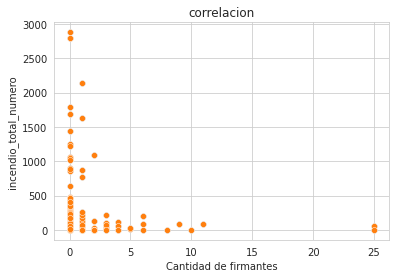

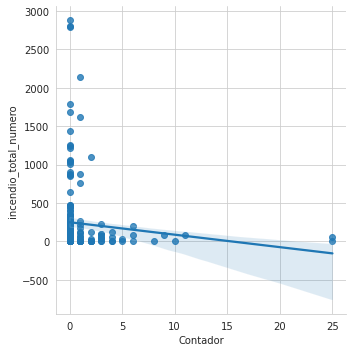

In [56]:
#grafico de correlacion
sns.scatterplot(x='Contador', y='incendio_total_numero', data = df);
ax = sns.scatterplot(x='Contador', y='incendio_total_numero', data = df)
ax.set_title('correlacion')
ax.set_xlabel('Cantidad de firmantes');
sns.lmplot(x='Contador', y = 'incendio_total_numero', data = df);

In [59]:
#regresión simple
X = df[['incendio_total_numero']]
y = df[['Contador']]

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.01021463725302385

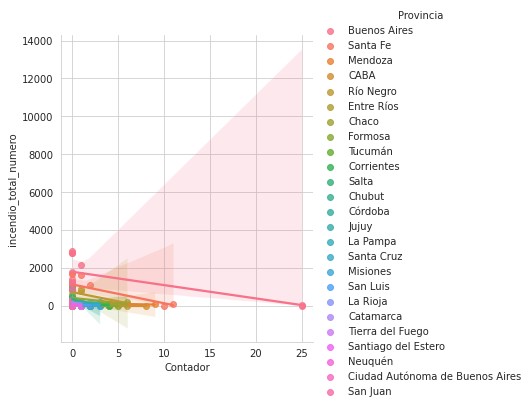

In [58]:
#no dice mucho mas y es confuso por la cantidad de provincias pero lo dejo porque esta simpatico
sns.set_style('whitegrid')
sns.lmplot(x ='Contador', y = 'incendio_total_numero', hue = 'Provincia', data = df)